Goal

To recreate a #MakeoverMonday Tableau challenge using Python, with the aim of enhancing storytelling by improving the visualization.

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from janitor import clean_names
from highlight_text import HighlightText, ax_text, fig_text

In [2]:
df = pd.read_csv('generative_ai_search_trend.csv', names=['region', 'midjourney', 'stable_diffusion', 'dall_e'], header=0)

In [3]:
df.head(2)

,region,midjourney,stable_diffusion,dall_e
0,California,49%,29%,22%
1,Washington,43%,32%,25%


In [4]:
columns_to_convert = ['midjourney', 'stable_diffusion', 'dall_e']
df[columns_to_convert] = df[columns_to_convert].map(lambda x: int(x.strip('%')))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   region            51 non-null     object
 1   midjourney        51 non-null     int64 
 2   stable_diffusion  51 non-null     int64 
 3   dall_e            51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
url = 'https://www.census.gov/library/reference/code-lists/ansi/ansi-codes-for-states.html'

In [7]:
tables = pd.read_html(url)
len(tables)

3

In [8]:
usps = tables[0]
usps = clean_names(usps).drop('fips_state_numeric_code', axis = 1).rename(columns={"official_usps_code": "state"})

In [9]:
df = pd.merge(df, usps, how = 'left', left_on = ['region'], right_on = ['name'])
df = df.drop(["region", "name"], axis = 1)

In [10]:
df.head(2)

,midjourney,stable_diffusion,dall_e,state
0,49,29,22,CA
1,43,32,25,WA


In [11]:
df = pd.melt(df, id_vars=['state'], var_name='brand', value_name='value')

In [12]:
df.head(2)

,state,brand,value
0,CA,midjourney,49
1,WA,midjourney,43


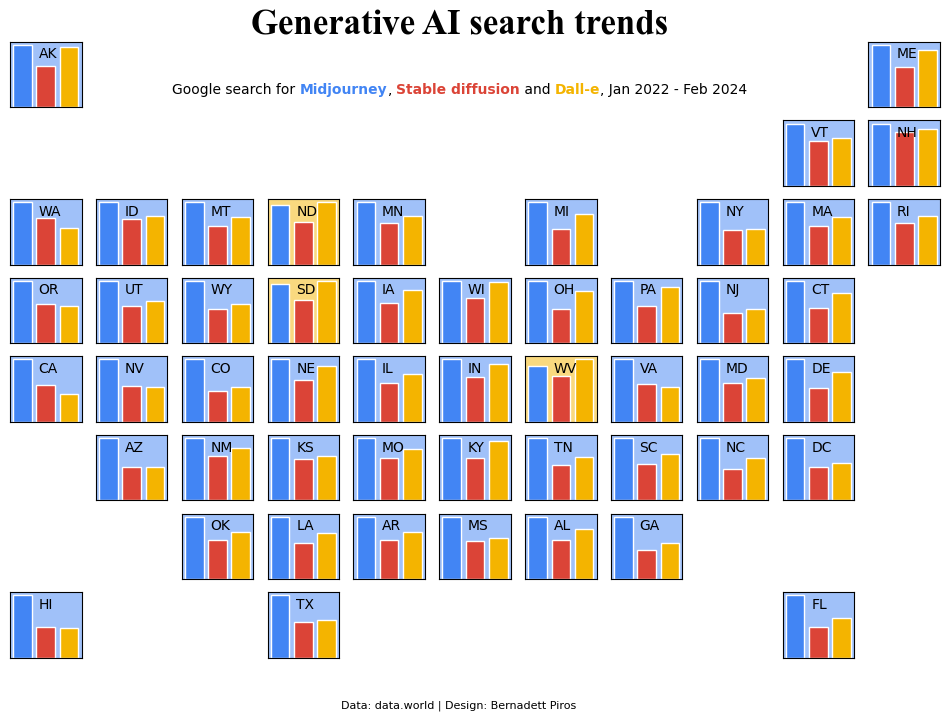

In [13]:
# Colors for the bars
colors = ['#4285F4', '#DB4437', '#F4B400']

# Create a figure with 8x11 axes
nrows, ncols = 8, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(12, 8))

# Positions of rows to be removed
rows_to_remove = [       (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9), 
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                                                     (2,5),        (2,7), 
                                                                                        (3,10), 
                                                                                        (4,10), 
                  (5,0),                                                                (5,10), 
                  (6,0), (6,1),                                           (6,8), (6,9), (6,10), 
                         (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8),        (7,10)]

# First letters of states
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL']

# Iteare over each axis
state = 0
for row in range(nrows):
    for col in range(ncols):
        
        # Test if specific row is to be removed
        if (row, col) in rows_to_remove:
            axs[row, col].axis('off')
        
        # Axes to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
                       
            # Add state's letters
            letters = letters_state[state]
            axs[row, col].annotate(letters, xy=(0.4, 0.75),
                                   xycoords='axes fraction')
            state += 1
            
            # Filter on state data
            state_data = df[df['state']==letters]         

            # Create the bar chart
            bars=axs[row, col].bar(state_data['brand'], state_data['value'], color = colors, edgecolor='white')      
            
            # Determine the background color for each plot based on the biggest bar
            b_color = max(bars, key=lambda x: x.get_height()).get_facecolor()
            axs[row, col].set_facecolor(b_color)
            axs[row, col].patch.set_alpha(0.5)
            

# Title and subtitle
title = 'Generative AI search trends'
font_params = {'fontfamily': 'serif',
               'fontname': 'Times New Roman',
               'fontsize': 25, 'weight': 'bold'}
fig.text(0.5, 0.90, title,
         ha='center', va='center',
         **font_params)

# Subtitle
text = f"""
Google search for <Midjourney>, <Stable diffusion> and <Dall-e>, Jan 2022 - Feb 2024
"""
fig_text(0.5, 0.82, text, ha='center', va='center', fontsize=10,
         highlight_textprops=[{"color": "#4285F4", "fontweight":"bold"}, {"color": "#DB4437", "fontweight":"bold"}, {"color": "#F4B400", "fontweight":"bold"}]         
         )

# Source 
fig.text(0.5, 0.05, 'Data: data.world | Design: Bernadett Piros ', ha='center', va='center', fontsize=8)

# Display the plot
plt.show()    

#plt.savefig("gen_ai", bbox_inches='tight', pad_inches=0.2)